# Analisis Employee Attrition (Pengurangan Karyawan) 

### Disusun Oleh : Widiyarti Endang Saputri
------

Project ini bertujuan untuk menganalisis adanya pengurangan karyawan yang datanya diambil dari Repositori analisis HR. <br>
Pada dataset ini berisi tentang penghentian karywan. Untuk setiap 10 tahun itu menunjukkan karyawan yang aktif dan yang diberhentikan. Tujuannya adalah untuk melihat apakah penghentian individu dapat diprediksi dari data yang diberikan? <br>
Yang diprediksi adalah status aktif atau diberhentikan. <br>
<br>
Informasi yang terdapat di dalam data ini meliputi : <br> 
* EmployeeID = berisi tentang karyawan id 
* recorddate_key = berisi tentang tanggal catatan karyawan (tahun data)
* birthdate_key = berisi tentang tanggal lahir
* orighiredate_key = berisi tentang tanggal perekrutan
* terminationdate_key = berisi tentang tanggal pemutusan
* age = berisi tentang usia karyawan
* length_of_service = berisi tentang lama masa jabatan
* city_name = berisi tentang nama kota
* department_name =berisi tentang departemen
* job_title = berisi tentang jabatan {}  
* store_name = berisi tentang nomor toko
* gender_short = jenis kelamin pendek {}
* gender_full = jenis kelamin panjang{}
* termreason_desc = alasan pemutusan hubungan kerja {}
* termtype_desc = tipe pemutusan hubungan kerja {}
* STATUS_YEAR = tahun status
* STATUS = status{}
* BUSINESS_UNIT = unit bisnis{}

Sumber data dari [TerminationData.csv](https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data).

Pertama yang dilakukan adalah meload data dari file dataset TerminationData.csv . Disini menggunakan <i> Library Pandas </i> yang ada di Python untuk membuat DataFrame.

In [72]:
# Ambil data dari file TerminationData2.csv dari S3 bucket amazon Web Service 
import s3fs
import pandas as pd


s3=s3fs.S3FileSystem()

with s3.open('bucketbda03/TerminationData2.csv', 'rb') as f:
    data= pd.read_csv(f)

#menampilkan 5 data teratas
data.head()


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,7419,12/31/2012 0:00,1/20/1988,4/11/2010,1/1/1900,24,2,Fort St John,Processed Foods,Shelf Stocker,12,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,STORES
1,7419,12/31/2013 0:00,1/20/1988,4/11/2010,1/1/1900,25,3,Fort St John,Processed Foods,Shelf Stocker,12,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
2,7419,12/31/2014 0:00,1/20/1988,4/11/2010,1/1/1900,26,4,Fort St John,Processed Foods,Shelf Stocker,12,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
3,7419,12/31/2015 0:00,1/20/1988,4/11/2010,1/1/1900,27,5,Fort St John,Processed Foods,Shelf Stocker,12,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES
4,7420,12/31/2010 0:00,1/21/1988,4/12/2010,1/1/1900,22,0,Vancouver,Produce,Produce Clerk,44,F,Female,Not Applicable,Not Applicable,2010,ACTIVE,STORES


Selanjutnya, setelah load data yaitu membuat scatter plot masing-masing Feature. Disini Feature yang akan digunakan yaitu yang datanya berupa kuantitatif(angka). Dari dataset TerminationData.csv terdapat 5 Feature yang dapat digunakan yaitu 'EmployeeID', 'age', 'length_of_service', 'store_name', dan 'STATUS_YEAR'.

#### 1. Scatter Plot antara 'EmployeeID' dan 'length_of_service'

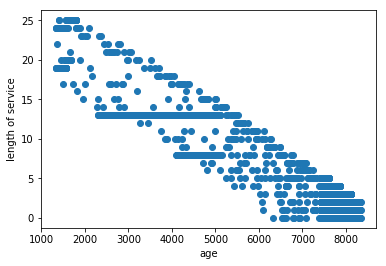

In [73]:
import matplotlib.pyplot as plt # menampilkan scatter plot

plt.scatter(data['EmployeeID'], data['length_of_service'])
plt.xlabel('age')
plt.ylabel('length of service')
plt.show()

#### 2. Scatter Plot antara 'age' dan 'length_of_service'

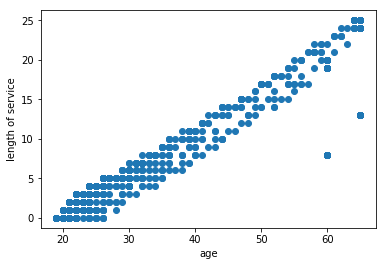

In [74]:
plt.scatter(data['age'], data['length_of_service'])
plt.xlabel('age')
plt.ylabel('length of service')
plt.show()

#### 3. Scatter Plot antara 'store_name' dan 'length_of_service'

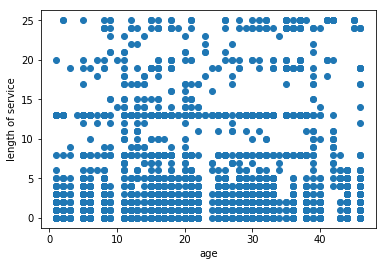

In [75]:
plt.scatter(data['store_name'], data['length_of_service'])
plt.xlabel('age')
plt.ylabel('length of service')
plt.show()

#### 4. Scatter Plot antara 'STATUS_YEAR' dan 'length_of_service'

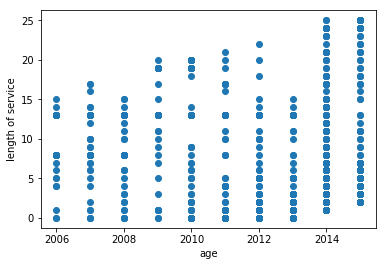

In [76]:
plt.scatter(data['STATUS_YEAR'], data['length_of_service'])
plt.xlabel('age')
plt.ylabel('length of service')
plt.show()

Nah, setelah membuat Scatter Plot. Dilihat dari beberapa pola yang terbentuk dapat disimpulkan bahwa ada 3 pasangan Feature yang memiliki korelasi di antaranya adalah Scatter Plot antara 'EmployeeID' dan 'length_of_service', 'EmployeeID' dan 'length_of_service', serta 'age' dan 'length_of_service'.  

Untuk memilih Feature yang memiliki dugaan adanya korelasi yang paling kuat yaitu dengan melihat besar nilai korelasinya. untuk melihat korelasi dapat menggunakan <i> Library </i> pandas 

In [77]:
# import set_option dari Library Pandas
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)

korelasi = data.corr(method='pearson')
print(korelasi)

                   EmployeeID    age  length_of_service  store_name  STATUS_YEAR
EmployeeID              1.000 -0.949             -0.944       0.023        0.508
age                    -0.949  1.000              0.901      -0.036       -0.507
length_of_service      -0.944  0.901              1.000      -0.023       -0.204
store_name              0.023 -0.036             -0.023       1.000        0.016
STATUS_YEAR             0.508 -0.507             -0.204       0.016        1.000


Dari nilai korelasi yang di dapatkan, Nilai Korelasi tertinggi yaitu 1 tapi jika di lihat lagi nilai 1 di dapatkan jika Features di hubungkan dengan dirinya sendiri jadi bisa di katakan tidak berhubungan. Nilai Korelasi yang tertinggi lainnya yaitu -0.949 (korelasi negatif) yang di dapatkan dari hubungan antara 'EmployeeID' dan 'age' (begitupun sebaliknya). Nah, Feature EmployeeID merupakan Identitas Karyawan dimana identitas tidak bisa di jadikan patokan untuk korelasi. Dan Nilai Korelasi yang tertinggi lainnya yaitu 0.901 yang di dapatkan dari hubungan antara 'age' dan 'length_of_service' (begitupun sebaliknya). Features 'age' dan 'length_of_service' bisa dikatakan memiliki korelasi yang kuat, dengan alasan jika umur suatu karyawan semakin bertambah maka masa jabatan akan bertambah lama.

Korelasi antara Feature 'age' dan 'length_of_service' dapat di gambarkan Scatter Plot seperti ini.

In [78]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,5106.000,5106.000,5106.000,5106.000,5106.000
mean,6842.904,30.975,4.555,26.803,2012.365
std,1894.930,15.944,5.807,13.553,2.306
min,1338.000,19.000,0.000,1.000,2006.000
25%,7129.250,22.000,1.000,16.000,2011.000
50%,7654.000,23.000,2.000,26.000,2013.000
75%,7941.000,27.000,5.000,40.000,2014.000
max,8336.000,65.000,25.000,46.000,2015.000


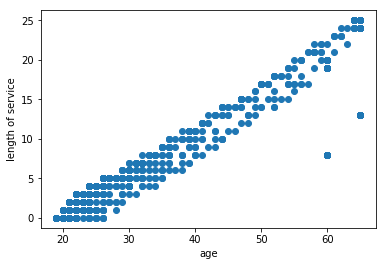

In [79]:
plt.scatter(data['age'], data['length_of_service'])
plt.xlabel('age')
plt.ylabel('length of service')
plt.show()

Dari Scatter Plot bisa di lihat bahwa Variable dependent yaitu Features 'age', sedangkan Variable Independent-nya adalah 'length_of_service' .

Langkah selanjutnya yaitu membuat statistik deskriptif dari Features 'age' dan 'length_of_service'. Statistik deskriptif yang akan digunakan yaitu menampilkan Data dalam berbagai tipe (Kind) seperti Vertical Bar, Pie Plot, Histogram serta menghitung mean, median dan st deviasi.

#### 1. Menampilkan Data  Feature 'age' dengan 'length_of_service' dalam tipe Vertical Bar

In [80]:
#import Libarary matplotlib
import matplotlib.pyplot as plt

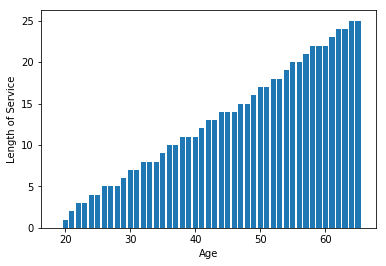

In [81]:
plt.bar(data['age'], data['length_of_service'])
plt.xlabel("Age") 
plt.ylabel("Length of Service")
plt.show()

Dengan mengamati Diagram Batang diatas, kita dapat mengetahui bahwa masa jabatan karyawan di pengaruhi oleh umur dari karyawan tersebut. Sehingga semakin bertambahnya usia karyawan berarti masa jabatan karyawan tersebut semakin lama. Seperti pada data, usia kurang 20th sampai 20tahun memiliki masa jabatan 0 sampai 1 tahun.

#### 2. Menampilkan Data Feature 'age' dalam tipe Histogram

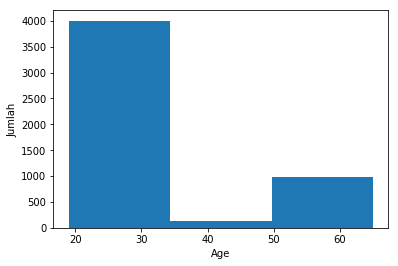

In [82]:
#Mengambil da Feature 'age' dan membagi batang menjadi 3
plt.hist(data['age'], 3)
plt.xlabel("Age") 
plt.ylabel("Jumlah")

plt.show()

Dengan mengamati Histogram Feature 'age' diatas, kita dapat mengetahui jumlah data dilihat dari umurnya, seperti karyawan yang berumur kurang dari 20 tahun sampai lebih dari 30tahun ada sekitar 4000 data.

#### 3. Menampilkan Data Feature 'length_of_service' dalam tipe Histogram

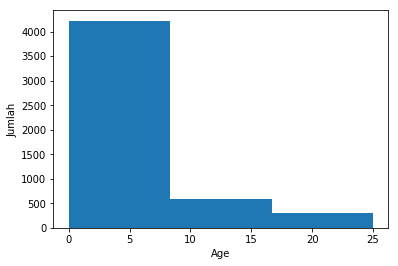

In [83]:
#Mengambil da Feature 'age' dan membagi batang menjadi 3
plt.hist(data['length_of_service'], 3)
plt.xlabel("Age") 
plt.ylabel("Jumlah")
plt.show()

Dengan mengamati Histogram Feature 'length_of_service' diatas, kita dapat mengetahui jumlah data di lihat dari masa jabatanya, seperti data yang memiliki masa jabatan lebih dari 15tahun ada sekitar kurang dari 500 data.

#### 4. Menampilkan Data Feature 'age' dalam tipe Pie Plot

In [84]:
#import library plotly dan import make_subplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [85]:
#menggunakan sqlalchemy dan import create_engine untuk membuat database 
from sqlalchemy import create_engine
engine= create_engine('sqlite:///:memory:')
data.to_sql('data_table', engine) #database bernama 'data_table'

In [86]:
#querySQL
sqla= pd.read_sql_query('SELECT age, Count("age") as Jumlah FROM data_table group by age', engine)

labels = sqla['age']
values = sqla['Jumlah']

# menguunakan `hole` untuk membuat-seperti pie plot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(title_text="<b>Total Usia </b>")
    
fig.show()

Dengan mengamati Pie Plot/ Pie Chat Feature 'age' diatas, kita dapat mengetahui dengan mudah jumlah data di lihat dari dari umurnya,  seperti karyawan yang berumur 22tahun di tunjukkan dengan warna biru ada sebanyak 740 dan jika di presentasikan sekita 14.5% dari data keseluruhan.

#### 5. Menampilkan Data Feature 'length_of_service' dalam tipe Pie Plot

In [87]:
#querySQL
sqlb= pd.read_sql_query('SELECT length_of_service, Count("length_of_service") as Jumlah FROM data_table group by age', engine)

labels = sqlb['length_of_service']
values = sqlb['Jumlah']

# menguunakan `hole` untuk membuat-seperti pie plot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(title_text="<b>Total Masa Jabatan </b>")
    
fig.show()

Dengan mengamati Pie Plot/ Pie Chat Feature 'length_of_service' diatas, kita dapat mengetahui dengan mudah jumlah data di lihat dari dari masa jabatannya,  seperti karyawan yang memiliki masa jabatan 1 tahun di tunjukkan dengan warna orange ada sebanyak 628 data dan jika di presentasikan sekitar 12.3% dari data keseluruhan. Dari Pie Plot d atas kita juga dapat mengetahui masa jabatan paling banyak yaitu 0 (kurang dari satu tahun) dengan jumlah data 2009. 

#### 6. Menampilkan Data Rata - Rata Umur berdasarkan Masa Jabatan dalam tipe Pie Plot

In [88]:
#querySQL
sqlc= pd.read_sql_query('SELECT length_of_service, AVG("age") as rerata_usia FROM data_table group by length_of_service', engine)

labels = sqlc['length_of_service']
values = sqlc['rerata_usia']

# menguunakan `hole` untuk membuat-seperti pie plot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])

fig.update_layout(title_text="<b>Rata - Rata Umur berdasarkan Masa Jabatan</b>")
    
fig.show()

Dengan mengamati Pie Plot/ Pie Chat Feature diatas, kita dapat mengetahui dengan mudah jumlah data di lihat dari rata - rata umur berdasarkan masa jabatannya. Seperti karyawan yang memiliki masa jabatan 23tahun rata-rata berumur 61 tahun dan jika di presentasikan sekitar 5.26% dari data keseluruhan. Dari Pie Plot d atas kita juga dapat mengetahui masa jabatan lihat dari rata - rata umur paling banyak ada 2 yaitu 24 tahun dengan rata-rata umur 64tahun. 

Setelah mengamati hasil dari dari berbagai macam grafik di atas, statistik Deskriptif selanjutnya yaitu mecari Mean, Median, dan Standart Deviasi dari Feature 'age' dan 'length_of_service'.

#### 7. Menghitung mean, median dan st deviasi dari masing-masing Feature 'age' dan 'length_of_service'

In [24]:
#import library numpy 
import numpy as np

#age
#np.mean untuk mecari nilai rata2
mean_age = np.mean(data['age']) 
#np.median untuk mecari nilai rata2
median_age = np.median(data['age'])
#np.std untuk mecari nilai rata2
stdev_age = np.std(data['age'])
print('Mean Age = ', mean_age)
print('Median Age = ', mean_age)
print('St Dev Salary = ', stdev_age)

print()

#usia
mean_length_of_service = np.mean(data['length_of_service'])
median_length_of_service = np.median(data['length_of_service'])
stdev_length_of_service = np.std(data['length_of_service'])
print('Mean length of service = ', mean_length_of_service)
print('Median length of service = ', median_length_of_service)
print('St Dev length of service = ', stdev_length_of_service)

Mean Age =  30.975323149236193
Median Age =  30.975323149236193
St Dev Salary =  15.942518727963016

Mean length of service =  4.554837446141794
Median length of service =  2.0
St Dev length of service =  5.806366724449377


Setelah dilakukan perhitungan dapat disimpulkan bahwa untuk Feature 'age' memiliki rata-rata 42.077034620264634, mediannya 42.077034620264634 dan Standar Deviasinya St Dev Salary =  12.427132257589273. Sedangkan Feature 'length_of_service' memiliki rata-rata 10.434596096912573, mediannya 10.0 dan Standar Deviasinya 10.0.

Langkah selanjutnya yaitu membuat analisis model regresi (linear atau nonlinear). Sebelum memilih regresi, yang harus dilakukan yaitu melihat pola sebaran data. Pola sebaran dapat dilihat dengan menggunakan Scatter Plot dan Feature yang digunakan adalah yang memiliki korelasi yang kuat. Pada data ini ditujukkan Feature yang memiliki korelasi yang kuat yaitu Feature 'age' dan 'length_of_service' dengan nilai korelasi sebesar 0.909 .

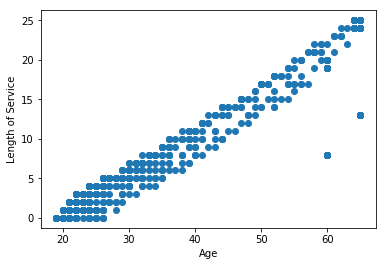

In [25]:
#melihat pola sebaran data
plt.scatter(data['age'], data['length_of_service'])
plt.xlabel("Age") 
plt.ylabel("Length of Service")
plt.show()

Setelah melihat pola sebaran, yaitu membuat garis untuk menentukan apakah pola sebaran tersebut cocok memakai model regresi linear atau model regresi non linear. Pertama Mencoba menggunakan model regresi linear.

intercept: -5.613215683310725
slope: [0.32826302]


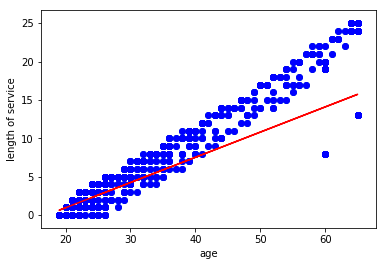

In [39]:
import matplotlib.pyplot as plot # menampilkan scatter plot

#import Linear Regresssion dari Library Sklearn.linear_model
from sklearn.linear_model import LinearRegression

#membuat array untuk Feature 'age' dan 'length_of_service'
x = np.array(data['age']).reshape((-1,1))
y = np.array(data['length_of_service'])

plt.plot(x,y, 'bo')

# tambahkan informasi sumbu x dan y
plt.xlabel("age")
plt.ylabel("length of service");

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_predict = model.intercept_ + model.coef_*x
plot.scatter(x,y)
plot.plot(x, y_predict, color = 'r')
plot.show()

Setelah dibuat garis merah, Kemudian langkah selanjutnya yaitu menunjukkan tingkat keakuratan model regresi yaitu linear regresi. Keakuratan bisa ditunjukkan dengan nilai MAE (Mean Absolute Eror) , MSE(Mean Squared Error), dan R Score.

In [40]:
#import mean_absolute_error dari sk.learn metrics 
from sklearn.metrics import mean_absolute_error

#import mean_squared_error dari sk.learn metrics
from sklearn.metrics import mean_squared_error

#import r score dari sk.learn metrics
from sklearn.metrics import r2_score

#membuat array untuk Feature 'age' dan 'length_of_service' 
test_x = np.asanyarray(data[['age']])
test_y = np.asanyarray(data[['length_of_service']])
y_hat = model.predict(test_x)


# hitung mean absolute error
mae = mean_absolute_error(y_hat, test_y)
print("MAE:", mae)

# hitung mean squared error
mse = mean_squared_error(y_hat, test_y)
print("MSE:", mse)

# hitung r2
r2 = r2_score(y_hat, test_y)
print("R2:", r2)

MAE: 1.6276738964481388
MSE: 6.326053811080717
R2: 0.7690196217374818


Dan di dapatkanlah nilai R2 nya, yaitu sebesar 0.7690196217374818

Setelah di dapatkan nilai R2nya, lalu kita membuat pola regresi non linear.
Model regresi nonlinear yang akan digunakan antara lain : <br>
a. Sigmoid<br>
b. Eksponensial<br>
c. Quadratic<br>
d. Qubic 

In [51]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
def eksponensial(x, Beta_1, Beta_2):
     y = Beta_1*np.exp(Beta_2*x)
     return y
def Quadratic(x, Beta_1, Beta_2, Beta_3):
     y = Beta_1+Beta_2*x**1+Beta_3*x**2
     return y
def Qubic(x, Beta_1, Beta_2, Beta_3, Beta_4):
     y = Beta_1+Beta_2*x**1+Beta_3*x**2+Beta_4*x**3
     return y

x_data, y_data = (data["age"].values, data["length_of_service"].values)

In [52]:
# normalisasi data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Untuk menemukan parameter terbaik yaitu dengan menggunakan curve_fit. Curve_fit menggunakan kuadrat terkecil nonlinear agar sesuai dengan model regresi yang telah dibuat. 

popt adalah parameter yang dioptimalkan.

In [53]:
from scipy.optimize import curve_fit

popt1, pcov1 = curve_fit(sigmoid, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt1[0], popt1[1]))

popt2, pcov2 = curve_fit(eksponensial, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt1[0], popt1[1]))

popt3, pcov3 = curve_fit(Quadratic, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt3[0], popt3[1]))

from scipy.optimize import curve_fit
popt4, pcov4 = curve_fit(Qubic, xdata, ydata, maxfev=100000)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt4[0], popt4[1]))

 beta_1 = 4.501503, beta_2 = 0.876201
 beta_1 = 4.501503, beta_2 = 0.876201
 beta_1 = -0.576128, beta_2 = 2.223104
 beta_1 = -0.780946, beta_2 = 3.400445


Dan menampilkan hasil plot yang sudah diregresikan

SIGMOID


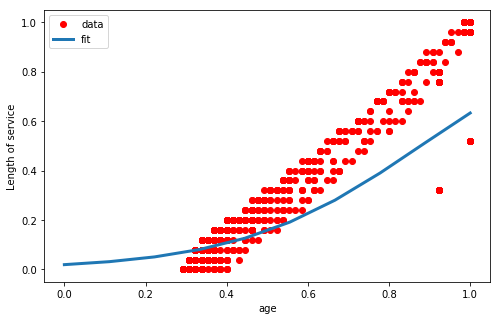

EXPONENSIAL


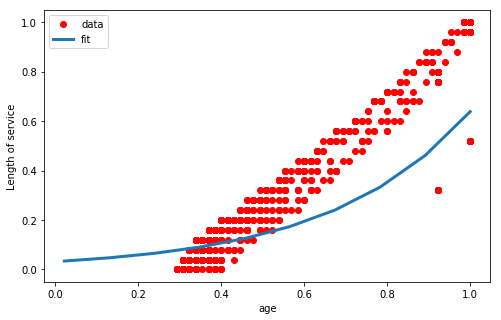

QUADRATIC


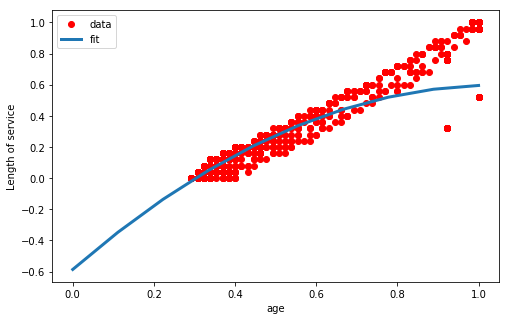

QUBIC


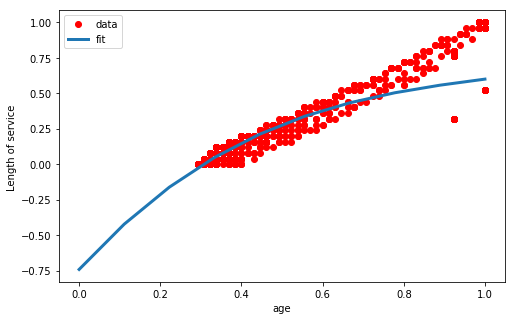

In [66]:
print("SIGMOID")
x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y1 = sigmoid(x, *popt1)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y1, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Length of service')
plt.xlabel('age')
plt.show()

print("EXPONENSIAL")
x = np.arange(0.2, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y2 = eksponensial(x, *popt2)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y2, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Length of service')
plt.xlabel('age')
plt.show()

print("QUADRATIC")
x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y3 = Quadratic(x, *popt3)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y3, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Length of service')
plt.xlabel('age')
plt.show()

print("QUBIC")
x = np.arange(0, 10, 1)
x = x/max(x)
plt.figure(figsize=(8,5))
y4 = Qubic(x, *popt4)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y4, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Length of service ')
plt.xlabel('age')
plt.show()

Setelah mendapatkan pola-pola masing-masing jenis regresi non linear, selanjutnya yaitu mengecek masing-masing akurasi jenis regresi dengan menggunakan R2

In [60]:
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt1, pcov1 = curve_fit(sigmoid, train_x, train_y, maxfev=100000)
popt2, pcov2 = curve_fit(eksponensial, train_x, train_y, maxfev=100000)
popt3, pcov3 = curve_fit(Quadratic, train_x, train_y, maxfev=100000)
popt4, pcov4 = curve_fit(Qubic, train_x, train_y, maxfev=100000)


# predict using test set
y_hat1 = sigmoid(test_x, *popt1)
y_hat2 = eksponensial(test_x, *popt2)
y_hat3 = Quadratic(test_x, *popt3)
y_hat4 = Qubic(test_x, *popt4)


# evaluation
print("===== Sigmoid =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )

# evaluation
print("===== Eksponensial =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )

# evaluation
print("===== Quadratic =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat3 , test_y) )

# evaluation
print("===== Qubic =====")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat4 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat4 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat4 , test_y) )


===== Sigmoid =====
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.69
===== Eksponensial =====
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.65
===== Quadratic =====
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.76
===== Qubic =====
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.77


Dan di dapatkanlah nilai R2 nya tertinggi, yaitu sebesar 0.77 dengan jenin regresi non linear <b> Qubic</b>. Nah di bandingkan yang Regresi Linear yang nilai keakuratan sebesar 0.7690196217374818.

Hasil keakuratan yang ditunjukkan dari perhitungan di atas dapatkan di simpulkan bahwa dataset ini cocok menggunakan model <b>regresi non linear</b>.

Analisis selanjutnya yaitu dengan pengelompokan obyek. Data set yang digunakan ini lebih cenderung ke analisis <b> Clustering K-Means </b> Yang bertujuan untuk menemukan kelas dalam data, dengan jumlah kelas yang diwakili oleh variable k. Variable k sendiri adalah jumlah cluster yang kita inginkan. Menentukan variabel yang diklusterkan. Disini menggunakan variable madv pada sumbu X dan variabel lstat pada sumbu Y

In [41]:
# Menentukan variabel yang akan akan di clusterkan
length_of_service_x = data.iloc[:, 5:7]
length_of_service_x.head()

,age,length_of_service
0,24,2
1,25,3
2,26,4
3,27,5
4,22,0


Langkah selanjutnya yaitu visualisasi gambar sebaran.

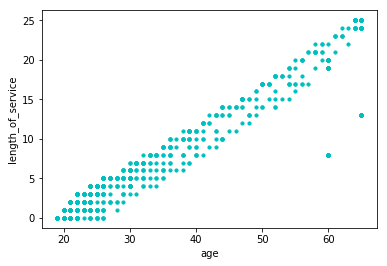

In [65]:
# Memvisualkan persebaran data 
plt.scatter(data['age'], data['length_of_service'], s =10, c = "c", marker = "o", alpha = 1)
plt.ylabel('length_of_service')
plt.xlabel('age')
plt.show()

Mengubah Feature 'length_of_service' Menjadi Array

In [43]:
 x_array =  np.array(length_of_service_x)
print(x_array)

[[24  2]
 [25  3]
 [26  4]
 ...
 [21  2]
 [19  0]
 [20  1]]


Kemudian, langkah yang di lakukan yaitu menstandarkan Ukuran Variabel

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

C:\Users\widiya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



array([[0.10869565, 0.08      ],
       [0.13043478, 0.12      ],
       [0.15217391, 0.16      ],
       ...,
       [0.04347826, 0.08      ],
       [0.        , 0.        ],
       [0.02173913, 0.04      ]])

Langkah selanjutnya yaitu menentukan nilai k (jumlah kelas yang di pilih). disini akan di coba dengan menggunakan 3 kelas.

In [45]:
# Menentukan dan mengkonfigurasi fungsi kmeans 
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data ---
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Setelah menentukan kluster yang dipih, lalu menampilkan pusat cluster yang sudah dipilih.

In [ ]:
# Menampilkan pusat cluster 
print(kmeans.cluster_centers_)

Kemudian, setelah menampilkan pusat kluster. selanjutnya melihat kluster dari data set yang dimiliki.

In [47]:
# Menampilkan Hasil Kluster 
print(kmeans.labels_)
# Menambahkan Kolom "kluster" Dalam Data Frame Driver 
data["kluster"] = kmeans.labels_

[0 0 0 ... 0 0 0]


Dan Langkah terakhir mari visualisasikan hasil clusternya.

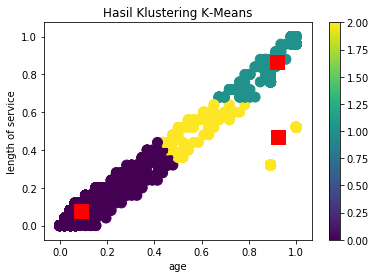

In [64]:
# Memvisualkan hasil kluster ---
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.ylabel('length of service')
plt.xlabel('age')
plt.colorbar (output)
plt.show()

Dari gambar diatas, dapat dilihat bahwa antara 'length of service' dan 'age' telah tercluster menjadi 3